In [34]:
import pandas as pd
import numpy as np
import sys

sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import io

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip

plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 20

# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [35]:
import initial_condition
from process import weight
from visualize import rank as vr

In [36]:
global data_dir, ex_dir, output_dir
data_dir = '../../data/processed/internal/technology/'
ex_dir = '../../data/processed/external/'
output_dir = '../../output/figures/'

In [37]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

extract_population = initial_condition.EXTRACT_POPULATION

top_p_or_num = {'right_person_name': ('p', 3), 'right_person_addr': ('p', 100)}
# region_corporation = initial_condition.REGION_CORPORATION

applicant_weight = initial_condition.APPLICANT_WEIGHT

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT

color_list = initial_condition.COLOR_LIST


input_condition_dict = {region_corporation:f'{ar}_{year_style}_{extract_population}_{top_p_or_num[region_corporation][0]}_{top_p_or_num[region_corporation][1]}_{region_corporation}_{applicant_weight}_{classification}_{class_weight}' 
                        for region_corporation in ['right_person_name', 'right_person_addr']}
fig_name_base_dict = {region_corporation:f'{ar}_{year_style}_{extract_population}_{top_p_or_num[region_corporation][0]}_{top_p_or_num[region_corporation][1]}_{region_corporation}_{applicant_weight}_{classification}_{class_weight}.png'
                      for region_corporation in ['right_person_name', 'right_person_addr']}


In [38]:
period_order_dict = {
    f'{period_start}-{period_start+year_range-1}': i
    for i, period_start in enumerate(range(year_start, year_end + 1, year_range))
}

period_order_dict[f'{year_start}-{year_end}'] = len(period_order_dict)
period_order_dict

{'1981-1990': 0, '1991-2000': 1, '2001-2010': 2, '1981-2010': 3}

In [39]:
dfs_dict = {}
for region_corporation, input_condition in input_condition_dict.items():
    df = pd.read_csv(data_dir + f'{input_condition}.csv', encoding='utf-8',
                    sep=',')
    dfs_dict[region_corporation] = df



In [70]:
s = pd.read_csv('C:/Users/rin/Desktop/KCIinJapaneseFirms/data/processed/internal/graph/app_nendo_all_p_100_right_person_addr_fraction_schmoch35_fraction.csv')
s[(s[f'{ar}_{year_style}_period']==f'{year_start}-{year_end}')&(s[classification]=='Civil engineering')]

,app_nendo_period,right_person_addr,reg_num,rca,mcp,diversity,ubiquity,kci,tci,kh_1,...,ki_16,kh_17,ki_17,kh_18,ki_18,kh_19,ki_19,kh_20,ki_20,schmoch35
33,1981-2010,三重県,997.600,2.032,1,8,29,-0.591,-1.787,26.000,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
68,1981-2010,京都府,803.424,0.175,0,12,29,2.882,-1.787,14.417,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
102,1981-2010,佐賀県,213.900,2.451,1,14,29,-0.768,-1.787,24.714,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
137,1981-2010,兵庫県,4411.241,1.147,1,18,29,-0.324,-1.787,20.611,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
172,1981-2010,北海道,1242.546,3.427,1,12,29,-0.738,-1.787,26.917,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
207,1981-2010,千葉県,877.258,0.931,0,18,29,0.796,-1.787,20.167,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
242,1981-2010,和歌山県,99.667,0.473,0,12,29,0.931,-1.787,20.500,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
277,1981-2010,埼玉県,1637.669,0.870,0,17,29,-0.012,-1.787,21.059,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
311,1981-2010,大分県,173.917,3.233,1,11,29,-0.816,-1.787,28.000,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering
346,1981-2010,大阪府,32262.729,1.347,1,15,29,-0.696,-1.787,21.267,...,22.093,22.093,13.458,13.458,22.093,22.093,13.458,13.458,22.093,Civil engineering


In [59]:
a = dfs_dict['right_person_addr'][dfs_dict['right_person_addr'][f'{ar}_{year_style}_period']==f'{year_start}-{year_end}'][[classification, 'right_person_addr']].drop_duplicates().sort_values('right_person_addr', ascending=False)
b = dfs_dict['right_person_addr'][dfs_dict['right_person_addr'][f'{ar}_{year_style}_period']==f'{year_start}-{year_end}'][[classification, 'ubiquity', 'tci']].drop_duplicates().sort_values('tci', ascending=False)
c = pd.merge(a, b, on=[classification], how='inner').sort_values(['tci'], ascending=[False])
c['decrease_rate'] = 1 - (c['ubiquity'] / c['right_person_addr'])
c

,schmoch35,right_person_addr,ubiquity,tci,decrease_rate
31,Digital communication,46,4,8.919,0.913
20,Computer technology,47,5,7.216,0.894
32,Telecommunications,46,6,6.395,0.870
33,Basic communication processes,44,7,6.208,0.841
30,Optics,46,6,5.023,0.870
19,Control,47,12,3.234,0.745
9,Audio-visual technology,47,9,3.020,0.809
22,Semiconductors,47,13,2.867,0.723
24,Measurement,47,14,2.578,0.702
0,"Electrical machinery, apparatus, energy",47,17,2.140,0.638


In [30]:
eu_df = pd.read_csv(f'{ex_dir}abroad/eu.csv', 
                    encoding='utf-8', 
                    sep=',')
eu_df

,schmoch35,schmoch5,reg_num_eu,TCI_eu,period
0,Digital communication,Electrical engineering,24566,100.000,1985-2009
1,Telecommunications,Electrical engineering,34007,96.970,1985-2009
2,Computer technology,Electrical engineering,34246,93.940,1985-2009
3,Audio-visual technology,Electrical engineering,21662,90.910,1985-2009
4,IT methods for management,Electrical engineering,5565,87.880,1985-2009
5,Pharmaceuticals,Chemistry,62999,84.850,1985-2009
6,Organic fine chemistry,Chemistry,99687,81.820,1985-2009
7,Basic communication processes,Electrical engineering,6284,78.790,1985-2009
8,Optics,Instruments,17771,75.760,1985-2009
9,Semiconductors,Electrical engineering,17315,72.730,1985-2009


In [31]:
name_addr_df = pd.merge(dfs_dict['right_person_name'][[f'{ar}_{year_style}_period', classification, 'tci']]\
                            .rename(columns={'tci': 'tci_name'}), 
                        dfs_dict['right_person_addr'][[f'{ar}_{year_style}_period', classification, 'tci']]\
                            .rename(columns={'tci': 'tci_addr'}),
                        on=[f'{ar}_{year_style}_period', classification], how='inner')
name_addr_df = name_addr_df[name_addr_df[f'{ar}_{year_style}_period'] == f'{year_start}-{year_end}']\
                           .sort_values(by='tci_name', ascending=False).reset_index(drop=True)
name_addr_df = pd.merge(name_addr_df, eu_df[['schmoch35', 'schmoch5']], on='schmoch35', how='inner')
name_addr_df['schmoch5'] = name_addr_df['schmoch5'].replace('Mechanical engineering', 'Mechanical engineering, machinery')
name_addr_df['schmoch5'] = name_addr_df['schmoch5'].replace('Chemistry', 'Chemistry, pharmaceuticals')
name_addr_df['tci_name'] = (name_addr_df['tci_name'] - name_addr_df['tci_name'].min()) / (name_addr_df['tci_name'].max() - name_addr_df['tci_name'].min()) * 100
name_addr_df['tci_addr'] = (name_addr_df['tci_addr'] - name_addr_df['tci_addr'].min()) / (name_addr_df['tci_addr'].max() - name_addr_df['tci_addr'].min()) * 100


In [33]:
name_addr_df.sort_values(by='tci_addr', ascending=False)


,app_nendo_period,schmoch35,tci_name,tci_addr,schmoch5
32,1981-2010,Digital communication,0.000,100.000,Electrical engineering
30,1981-2010,Computer technology,9.578,84.183,Electrical engineering
31,1981-2010,Telecommunications,7.414,76.551,Electrical engineering
29,1981-2010,Basic communication processes,13.763,74.818,Electrical engineering
22,1981-2010,Optics,54.326,63.806,Instruments
27,1981-2010,Control,34.693,47.182,Instruments
28,1981-2010,Audio-visual technology,17.968,45.192,Electrical engineering
25,1981-2010,Semiconductors,50.335,43.775,Electrical engineering
21,1981-2010,Measurement,59.253,41.087,Instruments
24,1981-2010,"Electrical machinery, apparatus, energy",51.730,37.018,Electrical engineering


1981-2010 -0.907


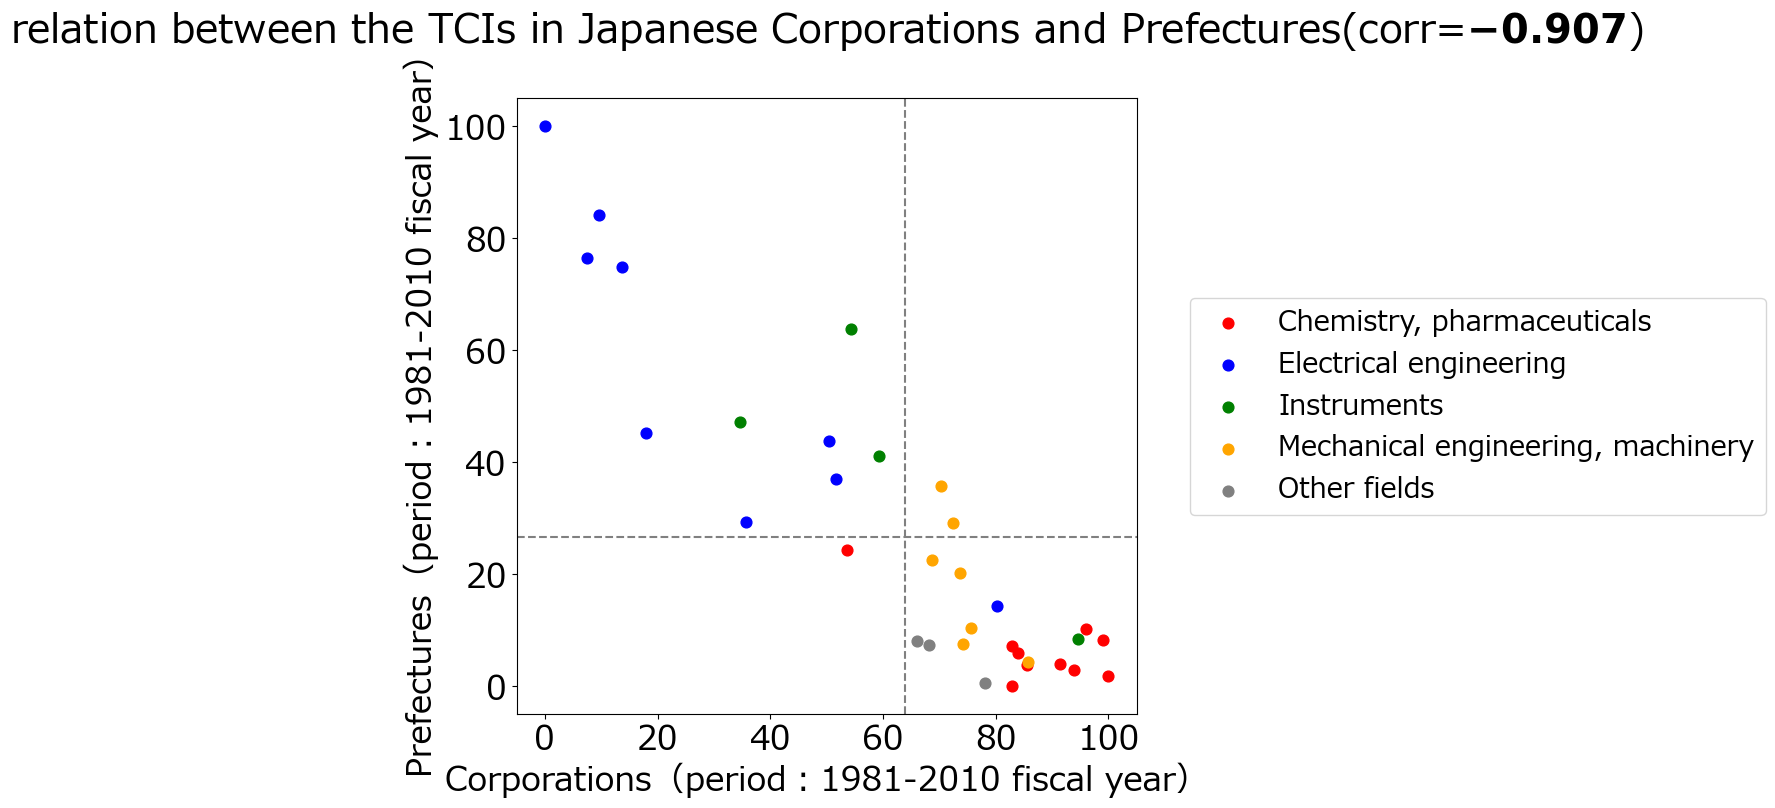

In [23]:
df_dict = {}
tech_color = {
        'Chemistry, pharmaceuticals': 'red',
        'Electrical engineering': 'blue',
        'Instruments': 'green', 
        'Mechanical engineering, machinery': 'orange',
        'Other fields': 'gray'
    }
combi_dict = {  # ind: [x, y, title, xlabel, ylabel, legend_loc]
    1: ["tci_name", "tci_addr", "relation between the TCIs in Japanese Corporations and Prefectures", "Corporations（period：1981-2010 fiscal year）", "Prefectures（period：1981-2010 fiscal year）", "center", ],
    # 1: ["tci_name", "tci_addr", "corr between the TCIs in Japan and EU", "Japan（period：1981-2010 fiscal year）", "EU（period：1985-2009 year）", "center", ],
    # 2: ["reg_num_jp", "reg_num_eu", "corr between the patent amounts in Japan and EU", "Japan（period：1981-2010 fiscal year）", "EU（period：1985-2009 year）", "center", ],
    # 3: ["reg_num_jp", "tci_name", "corr between the patent amounts in Japan and TCI in Japan", "Japan（period：1981-2010 fiscal year）", "Japan（period：1981-2010 fiscal year）", "center", ],
    # 4: ["reg_num_eu", "tci_addr", "corr between the patent amounts in EU and TCI in EU", "EU（period：1985-2009 year）", "EU（period：1985-2009 year）", "center", ],
    # 2: ["tci_addr", "tci_name", "corr between the TCIs in Japan and EU", "EU（period：1985-2009 year）", "Japan（period：1981-2010 fiscal year）", "center", ],
}

plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Meiryo'
for i, combi in combi_dict.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    period = f"{year_start}-{year_end}"
    corr_num = round(name_addr_df[combi[0]].corr(name_addr_df[combi[1]]), 3)
    print(period, corr_num)
    # ax.scatter(name_addr_df[combi[0]], name_addr_df[combi[1]],
    #            s=20, alpha=0.8, color="black", )
    # if i == 4:
    ax.axvline(x=name_addr_df[combi[0]].mean(), color="gray", linestyle="--", )
    ax.axhline(y=name_addr_df[combi[1]].mean(), color="gray", linestyle="--", )
    ax.set_title(combi[2]+'(corr=' + r"$\bf{" + str(corr_num)+ "}$" +')\n')
    if combi[0] in ["reg_num"]: ax.set_xscale("log")
    if combi[1] in ["reg_num"]: ax.set_yscale("log")
    x_min = name_addr_df[combi[0]].min()
    x_2smallest = (name_addr_df[combi[0]].nsmallest(2).iloc[1])
    y_2smallest = (name_addr_df[combi[1]].nsmallest(2).iloc[1])
    head_df = name_addr_df.head(5)
    between_df = name_addr_df.iloc[5:len(name_addr_df)-5, :]
    tail_df = name_addr_df.tail(5)
    if i != 5:
        # display(name_addr_df)
        # for i, row in head_df.iterrows():
        #     ax.text(row[combi[0]], row[combi[1]], f'{i+1} {row["schmoch35"]}', fontsize=18, color="red")
        #     ax.scatter(row[combi[0]], row[combi[1]], s=20, color="red")
        # for i, row in between_df.iterrows():
        #     ax.text(row[combi[0]], row[combi[1]], f'{i+1} {row["schmoch35"]}', fontsize=15, color="black")
        #     ax.scatter(row[combi[0]], row[combi[1]], s=20, color="black")
        # for i, row in tail_df.iterrows():
        #     ax.text(row[combi[0]], row[combi[1]], f'{i+1} {row["schmoch35"]}', fontsize=18, color="blue", )
        #     ax.scatter(row[combi[0]], row[combi[1]], s=20, color="blue")
        # for i, row in head_df.iterrows():
        #     ax.text(row[combi[0]], row[combi[1]], f'{i+1} {row["schmoch35"]}', fontsize=18, color="red")
            
            # if i == 4: ax.scatter(row[combi[0]], row[combi[1]], s=40, color=tech_color[row['schmoch5']], label=row['schmoch5'])
            # else: ax.scatter(row[combi[0]], row[combi[1]], s=40, color=tech_color[row['schmoch5']])
        # for i, row in between_df.iterrows():
        #     # ax.text(row[combi[0]], row[combi[1]], i+1, fontsize=15, color="black")
        #     if i == 7: ax.scatter(row[combi[0]], row[combi[1]], s=40, color=tech_color[row['schmoch5']], label=row['schmoch5'])
        #     else: ax.scatter(row[combi[0]], row[combi[1]], s=40, color=tech_color[row['schmoch5']])
            
        # for i, row in tail_df.iterrows():
        #     # ax.text(row[combi[0]], row[combi[1]], i+1, fontsize=18, color="blue")
        #     ax.scatter(row[combi[0]], row[combi[1]], s=40, color="blue", label=f'{i+1} {row["schmoch35"]}')
        for tech_color_key in tech_color.keys():
            ax.scatter(name_addr_df[name_addr_df['schmoch5']==tech_color_key][combi[0]], name_addr_df[name_addr_df['schmoch5']==tech_color_key][combi[1]], 
                       color=tech_color[tech_color_key], label=tech_color_key, 
                       s=60)
        # for ind, row in head_df.iterrows():
        #     if ind == 1: ax.text(row[combi[0]]+1, row[combi[1]]-2, f'\n{ind+1} {row["schmoch35"]}', fontsize=20, color=tech_color[row['schmoch5']])
        #     else: ax.text(row[combi[0]]+1, row[combi[1]]-1, f'{ind+1} {row["schmoch35"]}', fontsize=20, color=tech_color[row['schmoch5']])
    # elif i == 2:
    #     for i, row in head_df.iterrows():
    #         ax.text(row[combi[0]], row[combi[1]], i+1, fontsize=18, color="red")
    #         ax.scatter(row[combi[0]], row[combi[1]], s=20, color="red")
    #     for i, row in between_df.iterrows():
    #         ax.text(row[combi[0]], row[combi[1]], i+1, fontsize=15, color="black")
    #         ax.scatter(row[combi[0]], row[combi[1]], s=20, color="black")
    #     for i, row in tail_df.iterrows():
    #         ax.text(row[combi[0]], row[combi[1]], i+1, fontsize=18, color="blue", )
    #         ax.scatter(row[combi[0]], row[combi[1]], s=20, color="blue")
    ax.set_ylabel(combi[4])
    ax.set_xlabel(combi[3])
    # ax.set_xscale('log')
    ax.legend(loc=combi[5], fontsize=20, bbox_to_anchor=(1.55, 0.5), borderaxespad=0)
    plt.show()
